## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation='relu')(input_layer)
    x = keras.layers.Dense(units=256, activation='relu')(x)
    x = keras.layers.Dense(units=128, activation='relu')(x)
    out = keras.layers.Dense(units=10, activation='softmax')(x)
    
    model = keras.models.Model(inputs=input_layer, outputs=out)
    return model
model = build_mlp()

In [5]:
# compile
model.summary()
opt = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
# epoch = 500
model.fit(x_train, y_train, 
          epochs=500,
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.8596 - accuracy: 0.3342 - val_loss: 1.7559 - val_accuracy: 0.3661
Epoch 2/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.6524 - accuracy: 0.4114 - val_loss: 1.6419 - val_accuracy: 0.4103
Epoch 3/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.5613 - accuracy: 0.4466 - val_loss: 1.5936 - val_accuracy: 0.4227
Epoch 4/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.5003 - accuracy: 0.4675 - val_loss: 1.4914 - val_accuracy: 0.4630
Epoch 5/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.4428 - accuracy: 0.4897 - val_loss: 1.4550 - val_accuracy: 0.4836
Epoch 6/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.4047 - accuracy: 0.4987 - val_loss: 1.4865 - val_accuracy: 0.4727
Epoch 7/500
50000/50000 [==============================] - 2s 

Epoch 56/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.3321 - accuracy: 0.8830 - val_loss: 2.3054 - val_accuracy: 0.5153
Epoch 57/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.3172 - accuracy: 0.8877 - val_loss: 2.2291 - val_accuracy: 0.5255
Epoch 58/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.3044 - accuracy: 0.8920 - val_loss: 2.3626 - val_accuracy: 0.5101
Epoch 59/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.2865 - accuracy: 0.8990 - val_loss: 2.2736 - val_accuracy: 0.5302
Epoch 60/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.2913 - accuracy: 0.8966 - val_loss: 2.8377 - val_accuracy: 0.4878
Epoch 61/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.3029 - accuracy: 0.8945 - val_loss: 2.3429 - val_accuracy: 0.5322
Epoch 62/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.2672 - accuracy: 0.9054

Epoch 111/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.1171 - accuracy: 0.9587 - val_loss: 3.8699 - val_accuracy: 0.5248
Epoch 112/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.1106 - accuracy: 0.9604 - val_loss: 3.8273 - val_accuracy: 0.5297
Epoch 113/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.0785 - accuracy: 0.9719 - val_loss: 4.1276 - val_accuracy: 0.5291
Epoch 114/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.0936 - accuracy: 0.9665 - val_loss: 4.0703 - val_accuracy: 0.5276
Epoch 115/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.0964 - accuracy: 0.9671 - val_loss: 4.0507 - val_accuracy: 0.5199
Epoch 116/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0998 - accuracy: 0.9651 - val_loss: 4.0097 - val_accuracy: 0.5342
Epoch 117/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.0921 - accuracy:

50000/50000 [==============================] - 2s 49us/step - loss: 4.8277e-04 - accuracy: 1.0000 - val_loss: 4.7414 - val_accuracy: 0.5568
Epoch 166/500
50000/50000 [==============================] - 2s 48us/step - loss: 4.5845e-04 - accuracy: 1.0000 - val_loss: 4.7513 - val_accuracy: 0.5564
Epoch 167/500
50000/50000 [==============================] - 2s 49us/step - loss: 4.5279e-04 - accuracy: 1.0000 - val_loss: 4.7542 - val_accuracy: 0.5569
Epoch 168/500
50000/50000 [==============================] - 2s 48us/step - loss: 4.3809e-04 - accuracy: 1.0000 - val_loss: 4.7619 - val_accuracy: 0.5555
Epoch 169/500
50000/50000 [==============================] - 2s 48us/step - loss: 4.2813e-04 - accuracy: 1.0000 - val_loss: 4.7638 - val_accuracy: 0.5572
Epoch 170/500
50000/50000 [==============================] - 2s 47us/step - loss: 4.2297e-04 - accuracy: 1.0000 - val_loss: 4.7680 - val_accuracy: 0.5577
Epoch 171/500
50000/50000 [==============================] - 2s 48us/step - loss: 4.1368e-

50000/50000 [==============================] - 2s 48us/step - loss: 2.4087e-04 - accuracy: 1.0000 - val_loss: 4.9558 - val_accuracy: 0.5576
Epoch 219/500
50000/50000 [==============================] - 2s 48us/step - loss: 2.3832e-04 - accuracy: 1.0000 - val_loss: 4.9600 - val_accuracy: 0.5584
Epoch 220/500
50000/50000 [==============================] - 2s 47us/step - loss: 2.3733e-04 - accuracy: 1.0000 - val_loss: 4.9610 - val_accuracy: 0.5575
Epoch 221/500
50000/50000 [==============================] - 2s 49us/step - loss: 2.3644e-04 - accuracy: 1.0000 - val_loss: 4.9614 - val_accuracy: 0.5574
Epoch 222/500
50000/50000 [==============================] - 2s 48us/step - loss: 2.3297e-04 - accuracy: 1.0000 - val_loss: 4.9674 - val_accuracy: 0.5574
Epoch 223/500
50000/50000 [==============================] - 2s 48us/step - loss: 2.3100e-04 - accuracy: 1.0000 - val_loss: 4.9714 - val_accuracy: 0.5574
Epoch 224/500
50000/50000 [==============================] - 2s 48us/step - loss: 2.3114e-

50000/50000 [==============================] - 2s 48us/step - loss: 1.6921e-04 - accuracy: 1.0000 - val_loss: 5.0812 - val_accuracy: 0.5569
Epoch 272/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.6793e-04 - accuracy: 1.0000 - val_loss: 5.0797 - val_accuracy: 0.5573
Epoch 273/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.6662e-04 - accuracy: 1.0000 - val_loss: 5.0825 - val_accuracy: 0.5569
Epoch 274/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.6597e-04 - accuracy: 1.0000 - val_loss: 5.0849 - val_accuracy: 0.5567
Epoch 275/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.6447e-04 - accuracy: 1.0000 - val_loss: 5.0890 - val_accuracy: 0.5566
Epoch 276/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.6378e-04 - accuracy: 1.0000 - val_loss: 5.0872 - val_accuracy: 0.5572
Epoch 277/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.6359e-

50000/50000 [==============================] - 2s 48us/step - loss: 1.3114e-04 - accuracy: 1.0000 - val_loss: 5.1672 - val_accuracy: 0.5565
Epoch 325/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.3045e-04 - accuracy: 1.0000 - val_loss: 5.1687 - val_accuracy: 0.5566
Epoch 326/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.3012e-04 - accuracy: 1.0000 - val_loss: 5.1731 - val_accuracy: 0.5570
Epoch 327/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.2951e-04 - accuracy: 1.0000 - val_loss: 5.1741 - val_accuracy: 0.5570
Epoch 328/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.2871e-04 - accuracy: 1.0000 - val_loss: 5.1748 - val_accuracy: 0.5561
Epoch 329/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.2812e-04 - accuracy: 1.0000 - val_loss: 5.1762 - val_accuracy: 0.5567
Epoch 330/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.2749e-

50000/50000 [==============================] - 2s 48us/step - loss: 1.0709e-04 - accuracy: 1.0000 - val_loss: 5.2408 - val_accuracy: 0.5576
Epoch 378/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.0697e-04 - accuracy: 1.0000 - val_loss: 5.2421 - val_accuracy: 0.5575
Epoch 379/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.0654e-04 - accuracy: 1.0000 - val_loss: 5.2430 - val_accuracy: 0.5567
Epoch 380/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.0632e-04 - accuracy: 1.0000 - val_loss: 5.2431 - val_accuracy: 0.5574
Epoch 381/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.0575e-04 - accuracy: 1.0000 - val_loss: 5.2455 - val_accuracy: 0.5572
Epoch 382/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.0554e-04 - accuracy: 1.0000 - val_loss: 5.2454 - val_accuracy: 0.5564
Epoch 383/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.0525e-

50000/50000 [==============================] - 2s 48us/step - loss: 9.1081e-05 - accuracy: 1.0000 - val_loss: 5.3004 - val_accuracy: 0.5570
Epoch 431/500
50000/50000 [==============================] - 2s 48us/step - loss: 9.0978e-05 - accuracy: 1.0000 - val_loss: 5.3017 - val_accuracy: 0.5567
Epoch 432/500
50000/50000 [==============================] - 2s 48us/step - loss: 9.0697e-05 - accuracy: 1.0000 - val_loss: 5.3022 - val_accuracy: 0.5569
Epoch 433/500
50000/50000 [==============================] - 2s 48us/step - loss: 9.0382e-05 - accuracy: 1.0000 - val_loss: 5.3028 - val_accuracy: 0.5572
Epoch 434/500
50000/50000 [==============================] - 2s 48us/step - loss: 9.0094e-05 - accuracy: 1.0000 - val_loss: 5.3055 - val_accuracy: 0.5574
Epoch 435/500
50000/50000 [==============================] - 2s 48us/step - loss: 8.9929e-05 - accuracy: 1.0000 - val_loss: 5.3063 - val_accuracy: 0.5567
Epoch 436/500
50000/50000 [==============================] - 2s 49us/step - loss: 8.9599e-

50000/50000 [==============================] - 2s 48us/step - loss: 7.9315e-05 - accuracy: 1.0000 - val_loss: 5.3532 - val_accuracy: 0.5574
Epoch 484/500
50000/50000 [==============================] - 2s 48us/step - loss: 7.9053e-05 - accuracy: 1.0000 - val_loss: 5.3530 - val_accuracy: 0.5570
Epoch 485/500
50000/50000 [==============================] - 2s 48us/step - loss: 7.8868e-05 - accuracy: 1.0000 - val_loss: 5.3557 - val_accuracy: 0.5572
Epoch 486/500
50000/50000 [==============================] - 2s 49us/step - loss: 7.8669e-05 - accuracy: 1.0000 - val_loss: 5.3557 - val_accuracy: 0.5565
Epoch 487/500
50000/50000 [==============================] - 2s 48us/step - loss: 7.8505e-05 - accuracy: 1.0000 - val_loss: 5.3568 - val_accuracy: 0.5570
Epoch 488/500
50000/50000 [==============================] - 2s 48us/step - loss: 7.8519e-05 - accuracy: 1.0000 - val_loss: 5.3575 - val_accuracy: 0.5572
Epoch 489/500
50000/50000 [==============================] - 2s 49us/step - loss: 7.8042e-

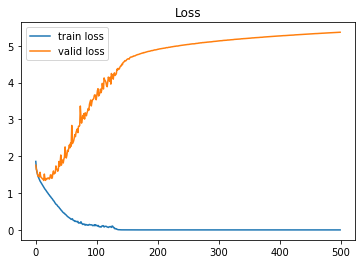

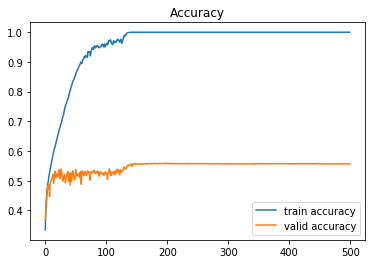

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()